In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('../../..')
from src import load_image, ImageQuant2
%matplotlib widget

In [2]:
membg = np.loadtxt('../Quantification model calibration/membg6.txt')
cytbg = np.loadtxt('../Quantification model calibration/cytbg.txt')
calibration_factor = np.loadtxt('../Quantification model calibration/optogenetics_factors.txt')[6]
print(calibration_factor)

3.1058749583500798


In [3]:
df = pd.read_csv('NEBD_Embryos_dataframe.csv')
df

,Unnamed: 0,Path,EmbryoID,Line,Date,RNAi
0,0,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292350,lp637,200129,wt
1,1,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292382,lp637,200129,wt
2,2,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292449,lp637,200129,wt
3,3,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292501,lp637,200129,wt
4,4,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1580292520,lp637,200129,wt
...,...,...,...,...,...,...
664,664,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1662545240,nwg496,220907,wt
665,665,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1662545908,nwg496,220907,wt
666,666,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1662546008,nwg496,220907,wt
667,667,/Users/blandt/Desktop/PaperData//Imaging/PAR-2...,1662546125,nwg496,220907,wt


### Import data

In [4]:
paths = df.Path.to_list()
lines = df.Line.to_list()
imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') if l != 'n2' else np.loadtxt(p + '/ROI_manual.txt') for p, l in zip(paths, lines)]

### Run quantification

100%|██████████| 600/600 [01:17<00:00,  7.73it/s]


<IPython.core.display.Javascript object>


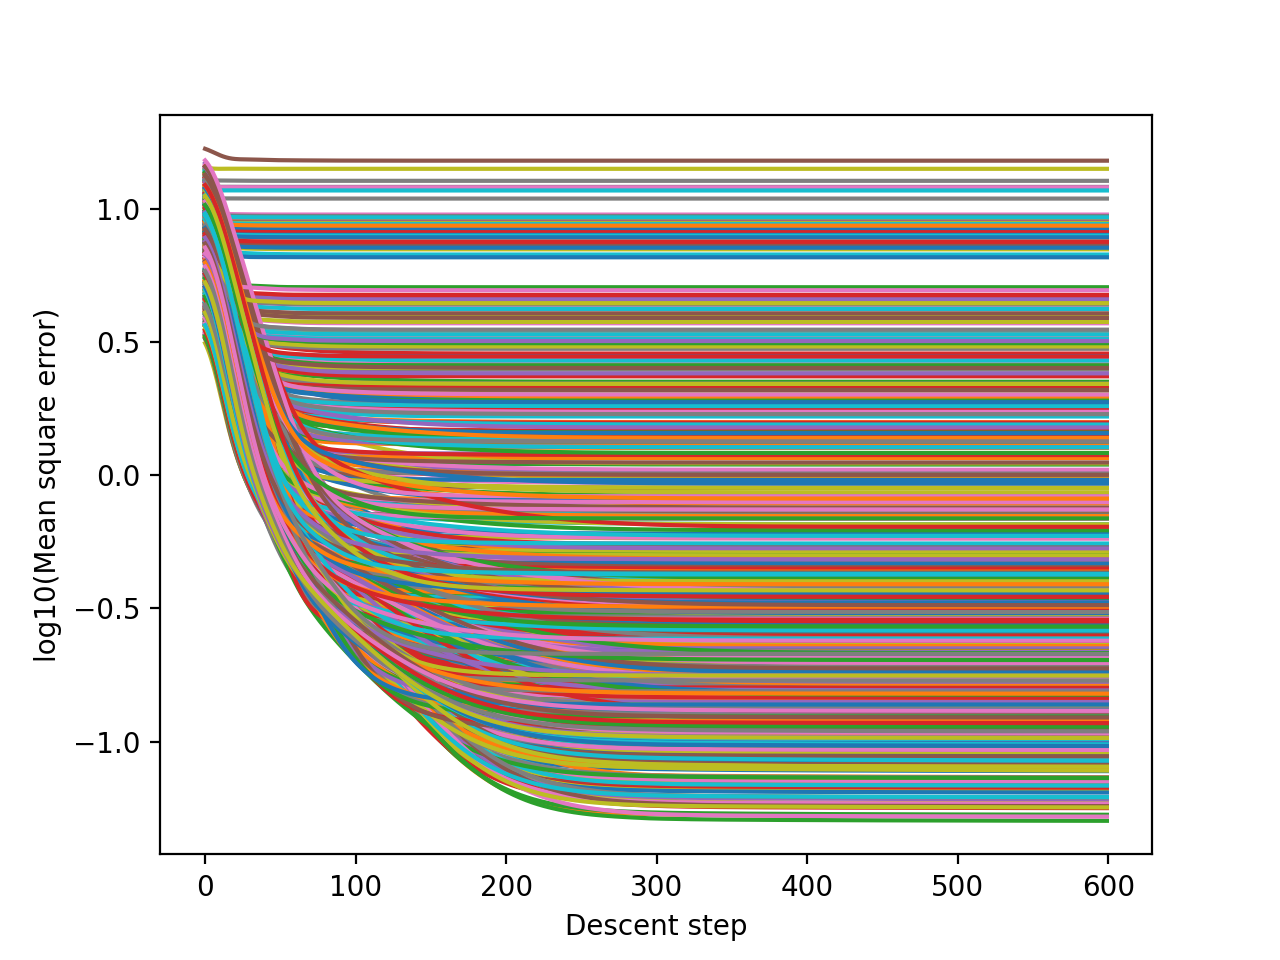

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [5]:
iq = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg)
iq.quantify()
iq.plot_losses(log=True)

### Save results

In [6]:
res = iq.compile_res(ids=df['EmbryoID'].to_list())
res['Membrane signal'] *= calibration_factor
res.to_csv('QUANTIFICATION.csv')